# Métodos Computacionais em Estatística
## Programa de Pós-Graduação em Modelagem e Métodos Quantitativos
### Universidade Federal do Ceará


In [1]:
# Biblitecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import scipy.stats as stats

# Atividade 1: Implementar um Gerador Linear Congruente (GLC)


## *Descrição:*

*O GLC é um método clássico para gerar números pseudo-aleatórios baseado na fórmula:
$$
X_{n+1} = (a \cdot X_n + c) \textrm{ mod } m
$$
em que $X_0$ é a semente inicial, $a$ é o multiplicador, $c$ é o incremento, e $m$ é o módulo.*


## Tarefas:


### 1. Implemente o GLC em Python.




In [2]:
# função ACL 1

def acl1(semente, multiplicador, incremento, modulo, quantidade):
  x0 = semente
  a = multiplicador
  b = incremento
  m = modulo
  n = quantidade

  sequencia = list()
  for i in range(quantidade):
    x = (a * x0 + b) % m
    sequencia.append(x)
    x0 = x
  return np.array(sequencia)

# Output com o exemplo dado em sala
acl1(semente = 5, multiplicador = 5, incremento = 1, modulo = 16,quantidade = 5)

array([10,  3,  0,  1,  6])

### 2. Gere 1000 números aleatórios com diferentes valores de a, c, e m.
Para isso, precisamos adaptar o código para que saia apenas o termo da sequencia que desejamos

In [3]:
# Gerando 1000 amostras
acl1(5, 5, 1, 16,1000)

array([10,  3,  0,  1,  6, 15, 12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,
        3,  0,  1,  6, 15, 12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,
        0,  1,  6, 15, 12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,
        1,  6, 15, 12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,
        6, 15, 12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6,
       15, 12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15,
       12, 13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12,
       13,  2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12, 13,
        2, 11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12, 13,  2,
       11,  8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12, 13,  2, 11,
        8,  9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12, 13,  2, 11,  8,
        9, 14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12, 13,  2, 11,  8,  9,
       14,  7,  4,  5, 10,  3,  0,  1,  6, 15, 12, 13,  2, 11,  8,  9, 14,
        7,  4,  5, 10,  3

### 3. Verifique a uniformidade dos números gerados usando um histograma.


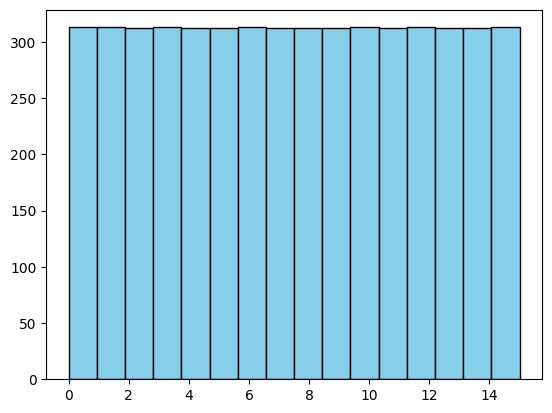

In [4]:
# função ACL 2
def acl2(semente, multiplicador, incremento, modulo, quantidade):
  x0 = semente
  a = multiplicador
  b = incremento
  m = modulo
  n = quantidade

  for i in range(quantidade):
    x = (a * x0 + b) % m
    x0 = x
  return x

# Armazenando 5000 amostras
num_aleatorios = list()
for i in range(1,5000):
  num_aleatorios.append(acl2(5, 5, 1, 16,i))

# # Plotando Histograma
plt.hist(num_aleatorios, bins=16, color='skyblue', edgecolor='black')
plt.show()

**Observação 1:** É importante que a quantidade de bins seja igual ao módulo. Isso será setado automaticamente na classe.
**Observação 2:** A função acl1 returna um array com os termos da sequência, enquanto a função acl2 retorna apenas o termo desejado.

### 4. Calcule a média e a variância dos números gerados e compare com os valores teóricos.

Comparar com os valores teóricos é verificar se a média e a variância dos números gerados pelo ACL são próximos da média e variância da distribuição uniforme (0,1). Ou seja, verificamos se a média é 0,5 e a variância é 1/12.

In [5]:
# Função acl3
@jit(nopython=True)
def acl3(semente, multiplicador, incremento, modulo, quantidade):
  x0 = semente
  a = multiplicador
  b = incremento
  m = modulo
  n = quantidade

  for i in range(quantidade):
    x = (a * x0 + b) % m
    x0 = x
  return x / m

# amostras
sequencia = list()
for i in range(1,100):
  sequencia.append(acl3(5, 5, 1, 16,i))

random_num = np.array(sequencia)

media = random_num.mean()
variancia = random_num.var()

resposta = (f"Média = {media:.4f} \t\t Média Esperada = 0.5 \n"
            f"Variância = {variancia:.4f} \t Variância Esperada = {1 / 12:.4f}")
print(resposta)

Média = 0.4628 		 Média Esperada = 0.5 
Variância = 0.0837 	 Variância Esperada = 0.0833


### 5. Teste a independência dos números gerados usando o teste de correlação.

In [6]:
# Criando Data Frame
df = pd.DataFrame({'ACL':num_aleatorios})


X = df['ACL']
Y = df['ACL'].shift(-1) # Faz uma pequena translação

correlacao = X.corr(Y)

print(f"A correção entre termos consecutivos é: {correlacao:.4f}")


A correção entre termos consecutivos é: 0.2711


Correlação é próxima de zero, logo os números são indepedentes.

### 6. Apresente dois conjuntos distintos de parâmetros, um que trás boas propriedades e outro que não.

10 primeiros termos: [40  0  0  0  0  0  0  0  0  0]


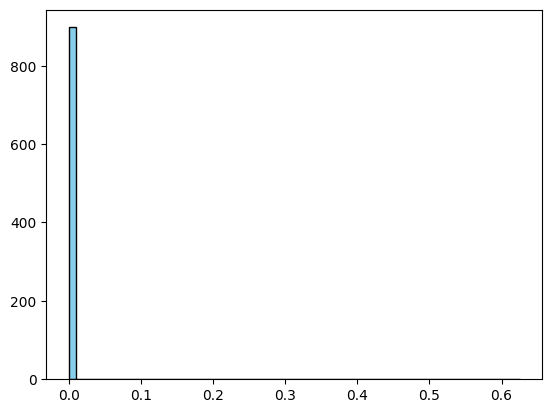

Para esses parâmetros ruins a média é 0.0007 e a variância é 0.0004


In [7]:
# Conjunto de Parametros RUINS

x0 = 5
a = 8
b = 0
m = 64
n = 10

print(f"10 primeiros termos: {acl1(x0, a, b, m, n)}")

# Armazenando 1000 amostras
num_aleatorios = list()
for i in range(1,900):
  num_aleatorios.append(acl3(x0, a, b, m,i))


# Plotando Histograma
plt.hist(num_aleatorios, bins=m, color='skyblue', edgecolor='black')
plt.show()

random_num = np.array(num_aleatorios)

media = random_num.mean()
variancia = random_num.var()

resposta = f"Para esses parâmetros ruins a média é {media:.4f} e a variância é {variancia:.4f}"
print(resposta)

10 primeiros termos: [     25     125     625    3125   15625   78125  390625 1953125 1377017
 6885085]


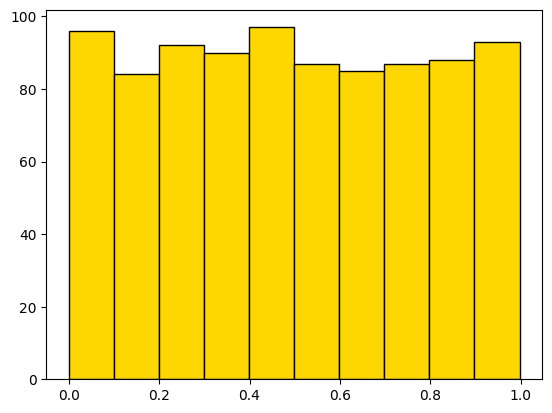

Para esses parâmetros bons a média é 0.4967 e a correlação é 0.2086


In [8]:
# Conjunto de Parametros BONS

x0 =5
a = 5
b = 0
m = np.power(2,23)
n = 10

print(f"10 primeiros termos: {acl1(x0, a, b, m, n)}")

# Armazenando 1000 amostras
num_aleatorios = np.array([acl3(x0, a, b, m,i) for i in range(1,900)])

# Plotando Histograma

plt.hist(num_aleatorios, bins=10, color='gold', edgecolor='black')
plt.show()

# Calculo de correlação e média
df = pd.DataFrame({'ACL':num_aleatorios})
X = df['ACL']
Y = df['ACL'].shift(-1)
correlacao = X.corr(Y)

media = num_aleatorios.mean()

resposta = f"Para esses parâmetros bons a média é {media:.4f} e a correlação é {correlacao:.4f}"
print(resposta)

# Classe




As tarefas da atividade 1 podem ser "compiladas" na biblioteca a seguir que permite geramos sequencias, termos, testar uniformidade e verificar correlação de forma mais simples.

In [9]:
class Acl():
  def __init__(self, x0, a, b, m):
    self.x0 = x0
    self.SEMENTE = x0
    self.a = a
    self.b = b
    self.m = m
    self.sequencia = list()
    self.sequenciazeroum = list()

  # retorna a lista dos n primeiros termos da sequeência
  def seq(self,termo):
    for i in range(termo):
      x = (self.a * self.x0 + self.b) % self.m
      self.sequencia.append(x)
      self.x0 = x
    return np.array(self.sequencia)

  # Retorna o enésimo termo da sequência
  # @jit(nopython=True)
  def termo(self,termo):
    for i in range(termo):
      x = (self.a * self.x0 + self.b) % self.m
      self.x0 = x
      return x

  # Retorna o enésimo termo da sequência Padronizado
  # @jit(nopython=True)
  def termozeroum(self,termo):
    for i in range(termo):
      x = (self.a * self.x0 + self.b) % self.m
      self.x0 = x
      self.sequenciazeroum.append(x / self.m)
      return x / self.m

  # Cria lista com a quantidade desejada de termos
  def random_lista(self, quantidade):
    num_aleatorios = list()
    for i in range(1,quantidade):
      num_aleatorios.append(self.enesimo(i))
    return num_aleatorios

  # Verifica uniformidade via Histograma
  def uniformidade(self, amostra = 1000, partes = 10):
    self.seq(amostra)
    # self.sequencia = np.array(self.sequencia)
    plt.title("Histograma de Amostras")
    plt.hist(self.sequencia, bins=partes, color='skyblue', edgecolor='black')
    plt.show()

  def independencia(self, quantidade):
    self.seq(quantidade)
    # Criando df
    df = pd.DataFrame({'ACL':self.sequencia})

    # Calculando correção
    X = df['ACL']
    Y = df['ACL'].shift(-1)
    correlacao = X.corr(Y)
    if correlacao >= 0 or correlacao < 0:
      print(f"A correção entre termos consecutivos é:",end="")
      return correlacao
    else:
      print("\033[31mNão foi possível calcular a correlação!! Verifique se seu gerador está com parâmetros adequados!")

A seguir estão os mesmos exemplos apresentados antes com um bom gerador e um gerador ruim.

[     25     125     625    3125   15625   78125  390625 1953125 1377017
 6885085  870993 4354965 4997609 8210829 7499713 3944133 2943449 6328637
 6477361 7220981 2550473 4363757 5041569   42021  210105 1050525 5252625
 1097301 5486505 2266701 2944897 6335877 6513561 7401981 3455473  500149
 2500745 4115117 3798369 2214629 2684537 5034077    4561   22805  114025
  570125 2850625 5864517 4156761 4006589 3255729 7890037 5895753 4312941
 4787489 7160229 2246713 2844957 5836177 4015061 3298089 8101837 6954753
 1219333 6096665 5317501 1421681 7108405 1987593 1549357 7746785 5179493
  731641 3658205 1513809 7569045 4290793 4676749 6606529 7866821 5779673
 3732541 1885489 1038837 5194185  805101 4025505 3350309 8362937 8260253
 7746833 5179733  732841 3664205 1543809 7719045 5040793   38141  190705
  953525 4767625 7060909 1750113  361957 1809785  660317 3301585 8119317
 7042153 1656333 8281665 7853893 5715033 3409341  269489 1347445 6737225
  131693  658465 3292325 8073017 6810653  498833 24

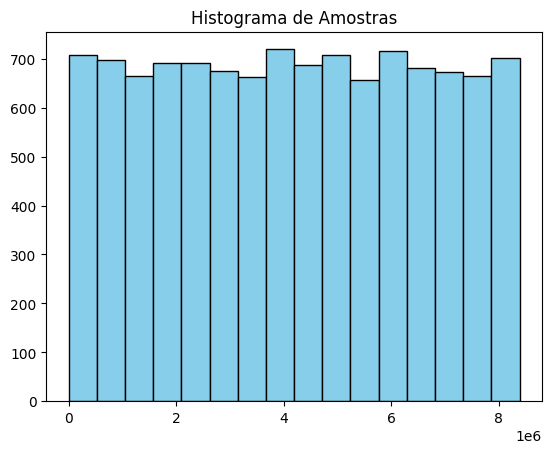

A correção entre termos consecutivos é:

0.21438727787704687

In [10]:
# Gerador bom
geradorbom = Acl(x0 = 5, a = 5, b = 0, m = 2 ** 23) # Inicializa a classe

print(geradorbom.seq(1000)) # imprime a sequência até o milésimo termo
geradorbom.uniformidade(10000,16)# Cria um histograma para verificar uniformidade
geradorbom.independencia(1000) # Calcula a correlação

[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

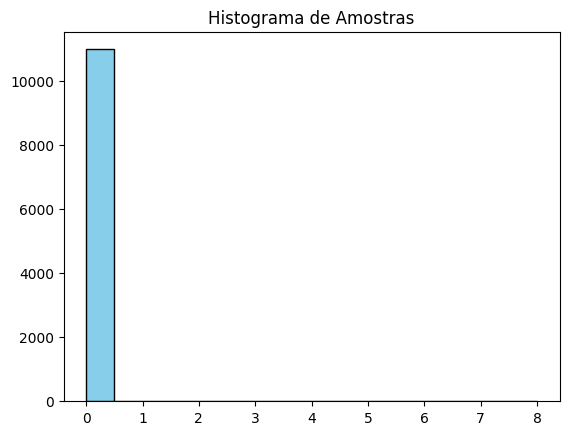

Não foi possível calcular a correlação!! Verifique se seu gerador está com parâmetros adequados!


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
# Gerador Ruim
geradorRuim = Acl(x0 = 5, a = 8, b = 0, m = 2 ** 4) # Inicializa a classe

print(geradorRuim.seq(1000)) # imprime a sequência até o milésimo termo
geradorRuim.uniformidade(10000,16)# Cria um histograma para verificar uniformidade
geradorRuim.independencia(1000) # Calcula a correlação


---

# Atividade 2: Implementar um Gerador de Tausworthe



## **Descrição:**



*Os geradores Tausworthe operam diretamente sobre
os bits.
Uma sequência de dígitos binários é definida pela recorrência:
$$
b_i = (c_1b_{i−1} + c_2b_{i−2} + \cdots + c_qb_{i−q}) \ (\ mod \ 2\ ),
$$
em que $c_1,...,c_q$ são constantes binárias.*

*Neste caso, um ciclo é definido como uma sequência
de valores binários que se repetem continuamente.
Portanto, como os q bits anteriores são utilizados, o
período pode chegar a $2^q − 1$ (uma sequência de zeros
é excluída, pois gera outra sequência de zeros).*

*Praticamente todos os geradores Tausworthe propostos são da forma
$$
b_i = (b_{i−r} + b_{i−q})\  (\ mod 2\ ),
$$
para inteiros $r$ e $q$ satisfazendo $0 < r < q$.*

- Note que a soma de variáveis binária módulo 2 é
o mesmo que a operação “ou exclusivo”, ou seja,
$b_i = 0$ se $b_{i−r} = b_{i−q}$, e $b_i = 1$ se $b_{i−r} \neq b_{i−q}$.
- Exemplo:
$r = 3, q = 5, b_1 = b_2 = \cdot = b_5 = 1.$

Assim, para $i ≥ 6, bi$ é o ou exclusivo
de $b_{i−3}$ e $b_{i−5}$.
Os primeiros $b_i’s$ serão
$$
1111100011011101010000100101100-111110..
$$

Note a repetição após 31 bits.

**Observações**
- Para gerar números entre 0 e 1, podemos particionar a sequência em grupos de $w$ bits, e dividir por $2^w$ cada número representado por um grupo de bits.
- Geradores Tausworthe oferecem algumas vantagens
potenciais com relação aos Congruente Lineares.
  - São independentes do computador utilizado (tamanho da word).
  - Oferecem períodos de qualquer tamanho.
  - Porém, testes empíricos da qualidade estatística dos número gerados podem ser inconclusivos.

fonte: [Geradores Tausworthe](http://www.univasf.edu.br/~criston.souza/simulacao/arquivos/6-Numeros_aleatorios.pdf)

## Tarefas:


### 1.Implemente o algoritmo de Tausworthe em Python.

In [12]:
# Função Geradora Algoritmo Tausworthe (gat)

def gat(r,q,n):
  b = np.ones(n+2, dtype=int)
  for i in range(n+2):
    b[i] =  (b[i - r] + b[i - q]) % 2
  return b

gat(3, 5, 32)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

### 2. Gere 1000 números aleatórios e verifique a uniformidade e a correlação dos números gerados.


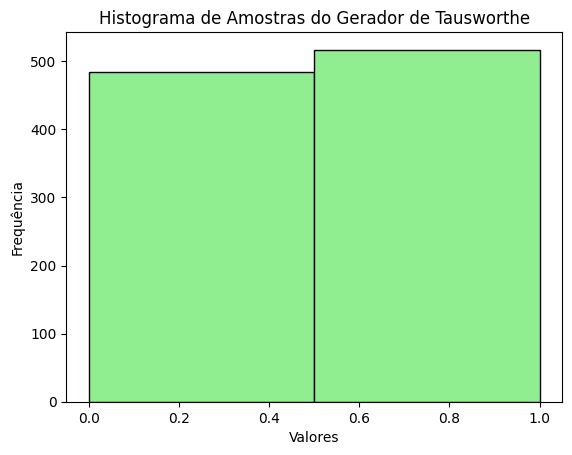

Para esses parâmetros a correlação é -0.0321


In [13]:
# Gerar mil amostras
n = 1000
sequencia = gat(3,5,n)

# Uniformidade pelo histograma
plt.hist(sequencia, bins=2, color='lightgreen', edgecolor='black')
plt.title("Histograma de Amostras do Gerador de Tausworthe")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

# correlação
df = pd.DataFrame({'gat':sequencia})

X = df['gat']
Y = df['gat'].shift(-1)
correlacao = X.corr(Y)

resposta = f"Para esses parâmetros a correlação é {correlacao:.4f}"
print(resposta)


 # Atividade 3: Implementar Testes de Aleatoriedade para Verificação





## *Descrição:*

*Verifique se os números gerados nos exercícios anteriores têm boas propriedades de aleatoriedade.*

## Tarefas:



### 1. Implemente o teste de chi-quadrado $(\chi^2)$ para verificar a uniformidade dos números.



O **teste de qui-quadrado** é utilizado para verificar se uma sequência de números gerados segue uma **distribuição uniforme**. Para números gerados de uma distribuição $ U(0, 1)$, esperamos que os valores gerados se distribuam de forma uniforme entre os intervalos de $[0, 1)$.

Este teste compara a **frequência observada** dos números gerados em subintervalos da unidade $[0, 1)$ com as **frequências esperadas** caso os números fossem distribuídos uniformemente.
A fórmula do teste de qui-quadrado é dada por:

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$

Em que:
- $O_i $  é a **frequência observada** no intervalo $ i $,
- $E_i $  é a **frequência esperada** no intervalo $i $,
- $k $   é o número de intervalos que dividem $[0, 1)$.

Para conseguirmos efetuar o teste $\chi^2$ precisamos realizar os seguintes passos:

1. **Dividir o intervalo** $[0, 1)$ em $ k $ subintervalos de tamanho igual.
2. **Contar quantos números** caem em cada subintervalo.
3. **Calcular a estatística**  $\chi^2$ utilizando a fórmula fornecida.
4. **Comparar a estatística** $\chi^2$  com o valor crítico da distribuição qui-quadrado para o grau de liberdade $ k-1 $ e o nível de significância escolhido (5% neste caso).





### Implementação:

In [14]:
# teste \chi^2
vetor = [np.random.uniform() for num in range(n)]

def teste_chi_quadrado(vetor = np.array([]), k=10):
    # Amostras Uniformes
    amostras = vetor

    # Divide o intervalo [0, 1) em k intervalos
    intervalos = np.linspace(0, 1, k + 1) # divide de forma igualitária
    observados = np.ones(k) # gera um vetor com k entradas todas iguais a 1

    # Conta quantos números caem em cada intervalo
    for amostra in amostras:
      # print(amostra)
      for num in range(k):
          if intervalos[num] <= amostra < intervalos[num+1]:
              observados[num] += 1
              # print(observados[num])
              break

    # Frequência esperada em cada intervalo
    esperado = n / k

    # Calcular o valor do qui-quadrado
    chi_quadrado = sum([(observado - esperado) ** 2 / esperado for observado in observados])

    # return chi_quadrado
    # Comparar com o valor crítico de qui-quadrado (grau de liberdade = k-1)
    valor_critico = stats.chi2.ppf(0.95, k-1)  # Nível de significância de 5%

    # Exibir resultados
    print(f"Estatística de chi-Quadrado: {chi_quadrado:.2f}")
    print(f"Valor Crítico de chi-Quadrado: {valor_critico:.2f}")

    if chi_quadrado < valor_critico:
        print("Os números seguem uma distribuição uniforme.")
    else:
        print("Os números não seguem uma distribuição uniforme.")




Uma vez implementado, vamos testar se os geradores anteriores fornecem uniformidade

In [15]:
# testando Gerador ACL
a = "Testando Uniformidade no gerador ACL"
print(a)

amostras1 = np.array([acl3(5, 5, 1, 16,i) for i in range(1000)])
teste_chi_quadrado(amostras1, 16)

print(len(a)*"-")

# Testando o Gerador de GAT
b = "Testando Uniformidade no gerador GAT"
print(b)

amostras2 = gat(3,5,1000)
teste_chi_quadrado(amostras2, 2)

print(len(b)*"-")

Testando Uniformidade no gerador ACL
Estatística de chi-Quadrado: 0.35
Valor Crítico de chi-Quadrado: 25.00
Os números seguem uma distribuição uniforme.
------------------------------------
Testando Uniformidade no gerador GAT
Estatística de chi-Quadrado: 498.39
Valor Crítico de chi-Quadrado: 3.84
Os números não seguem uma distribuição uniforme.
------------------------------------


 ### 2. Implemente o teste de autocorrelação para verificar a correlação entre os números gerados.



A **autocorrelação** é uma medida estatística que avalia a relação entre os valores de uma série temporal com os mesmos valores em defasagens (ou lags). A ideia central é verificar se há uma dependência temporal entre os valores: ou seja, se um número em um ponto no tempo depende dos valores anteriores.

Se os números gerados são **aleatórios**, a autocorrelação em defasagens diferentes de zero deve ser próxima de zero, o que indica que não há correlação entre os números da sequência.

#### Fórmula da Autocorrelação

A fórmula para calcular a autocorrelação $ \rho_k $ para uma defasagem $ k $ é dada por:

$$
\rho_k = \frac{\sum_{t=1}^{n-k} (X_t - \overline{X})(X_{t+k} - \overline{X})}{\sum_{t=1}^{n} (X_t - \overline{X})^2}
$$
Onde:
- $ X_t $ é o valor da sequência no instante $ t $,
- $ \overline{X} $ é a média da sequência,
- $ k $ é a defasagem,
- $ n $ é o número de elementos na sequência.

Para calcular a autocorrelação seguimos os seguintes passos:

1. **Subtrair a média da sequência** de cada valor da sequência.
2. **Multiplicar o valor de cada ponto da sequência** pela versão deslocada (deslocada por $ k $ passos).
3. **Somar os produtos dos pontos deslocados**.
4. **Dividir pela soma dos quadrados das diferenças** em relação à média (para normalizar o valor).

Ela basicamente verifica o quanto um valor da sequência está relacionado com os valores anteriores.
Se não houver dependência entre os valores, a autocorrelação deve ser zero.
Caso contrário, se houver autocorrelação significativa, podemos concluir que a sequência tem alguma estrutura temporal ou padrão, indicando que os números não são aleatórios.

### Implementação

In [16]:
# Função para calcular a autocorrelação para uma defasagem k
def autocor(sequencia, k = 1000):
    n = len(sequencia)
    media = np.array(sequencia).mean()  # média
    soma_num = 0  # Numerador
    soma_den = 0  # Denominador da fórmula

    for t in range(n - k):  # Iterar até o final da sequência menos a defasagem k
        soma_num += (sequencia[t] - media) * (sequencia[t + k] - media)
        soma_den += (sequencia[t] - media) ** 2

    return soma_num / soma_den  # Retorna a autocorrelação para a defasagem k

# Testando com a uniforme
N = 5000 # quantidade de amostras
sequencia = [np.random.uniform() for i in range(N)]

resposta = autocor(sequencia)
print(f"A autocorrelação é {resposta:.4f}")

# # Calcula autocor para defasagens de 1 a 30
# lags = list(range(1, N))
# autocor_val = [autocor(sequencia_aleatoria, lag) for lag in lags]

# # Plotar os resultados
# plt.figure(figsize=(10, 6))
# plt.plot(lags, autocor_val, marker='o', linestyle='-', color='b')
# plt.title('Autocorrelação para diferentes defasagens')
# plt.xlabel('Defasagem (lag)')
# plt.ylabel('Autocorrelação')
# plt.axhline(y=0, color='r', linestyle='--')  # Linha horizontal em y=0
# plt.grid(True)
# plt.show()


A autocorrelação é -0.0312


In [17]:
# testando Gerador ACL
N = 450 # quantidade de amostras

a = "Testando Uniformidade no gerador ACL"
print(a)

amostras1 = np.array([acl3(5, 5, 1, 16,i) for i in range(500)])
print(autocor(amostras1,N))

print(len(a)*"-")

# Testando o Gerador de GAT
b = "Testando Uniformidade no gerador GAT"
print(b)

amostras2 = gat(3,5,500)
print(autocor(amostras2,N))
print(len(b)*"-")

Testando Uniformidade no gerador ACL
-0.01988527632792587
------------------------------------
Testando Uniformidade no gerador GAT
0.0007754986261377942
------------------------------------


# Atividade 4: Gerar Variável Uniforme no Intervalo de 10 a 50





## *Descrição*




*Nesta atividade, você implementará uma variável aleatória uniforme no intervalo de **10 a 50**, utilizando a transformação de uma distribuição uniforme padrão no intervalo de **0 a 1**. Além disso, você realizará algumas análises básicas dessa amostra gerada, como calcular a **média**, a **mediana** e o **desvio padrão**, e visualizar a distribuição dos valores por meio de um **histograma**.*

## 1. Transformação Linear de uma Distribuição Uniforme


A distribuição uniforme padrão gera valores no intervalo $[0, 1]$.
Para mapear esses valores para o intervalo desejado de 10 a 50, pode-se utilizar uma transformação linear:

$$
X = a \cdot U + b
$$

Em que:
- $ X $ é a variável aleatória no intervalo de 10 a 50,
- $ U $ é a variável aleatória no intervalo de 0 a 1,
- $ a $ e $ b $ são constantes que determinam o intervalo de saída.

Para mapear o intervalo $[0, 1]$ para o intervalo $[10, 50]$, temos:
- $ a = 50 - 10 = 40 $ (amplitude do intervalo desejado),
- $ b = 10 $ (limite inferior do intervalo desejado).

Portanto, a fórmula fica:

$$
X = 40 \cdot U + 10
$$

Essa fórmula transforma os valores da distribuição uniforme $ U $ para o intervalo $[10, 50]$.


In [18]:
n = 5000
U = np.random.uniform(0, 1, n)
X = 40 * U + 10
print(X[:10])

[31.81478801 43.16243364 31.32238663 16.35426643 44.62365097 25.81936194
 11.76944141 41.41773616 10.82581625 28.62998204]


## 2. Cálculo da Média, Mediana e Desvio Padrão



Após gerar a amostra de valores uniformemente distribuídos entre **10 e 50**, podemos calcular:
- A **média** da amostra, que é a soma dos valores dividida pelo número de elementos.
- A **mediana**, que é o valor central da amostra quando os dados são ordenados.
- O **desvio padrão**, que mede a dispersão dos valores em relação à média

In [19]:
media = np.mean(X)
mediana = np.median(X)
desvio_padrao = np.std(X)
resposta = f"Média = {media:.4f}, mediana = {mediana:.4f} e desvio_padrao = {desvio_padrao:.4f}"
print(resposta)

Média = 30.1643, mediana = 30.1828 e desvio_padrao = 11.5205


## 3. Histograma para Visualização



Um **histograma** será utilizado para visualizar a distribuição dos valores gerados. O histograma nos ajudará a verificar se os valores estão distribuídos uniformemente no intervalo de 10 a 50, o que é esperado de uma variável uniforme.

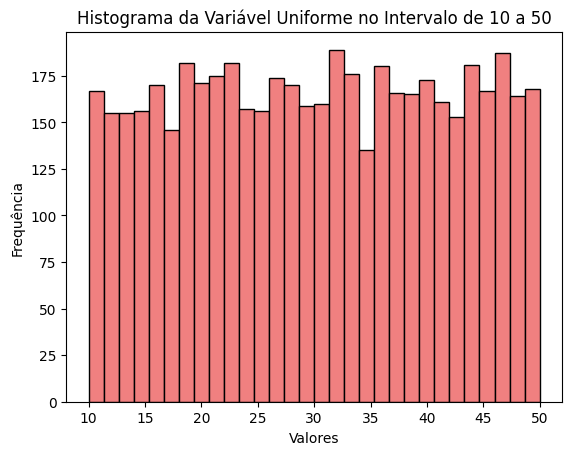

In [20]:
plt.hist(X, bins=30, edgecolor='black',color='lightcoral')
plt.title('Histograma da Variável Uniforme no Intervalo de 10 a 50')
plt.xlabel('Valores')
plt.ylabel('Frequência')
# plt.grid(True)
plt.show()

 # Atividade 5: Implementar um gerador de variáveis aleatórias Bernoulli




    
    


 #### *Descrição: Use uma transformação de variáveis para gerar uma sequencia de Bernoulli a partir de uma sequencia de variáveis uniforme unitárias.*

## Tarefas:

#### 1. Implemente inicialmente a Variável Aleatória Bernoulli com probabilidade de sucesso $ p = \frac{1}{2} $ da seguinte forma $$
X_i
=
I_{(U_i ≤ p)},
$$
com $\ U_i \sim U(0,1),i = 1,...,n.$

**Resposta**
Basicamente, precisamos utilizar um loop for baseado nas amostras da uniforme.
Se o valor da amostra for menor ou igual a $p$, então $X_i = 1$. Caso contrário, $X_i = 0$.

In [21]:
import numpy as np

# Função para gerar variáveis de Bernoulli com p = 1/2
def gerar_bernoulli(n, p = 0.5):
    sequencia = [1 if np.random.uniform() <= p else 0 for i in range(n)]
    return np.array(sequencia)

# Teste
n = 1000  # amostras
sequencia = gerar_bernoulli(n)
print(sequencia)

[0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0
 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 1 0 1 1 

#### 2. Implemente o teste de runs (ou teste de sequências) para verificar a independência dos números.



O teste de runs verifica se há independência nas sequências de dados gerados. Ele é baseado na contagem de "runs", ou seja, sequências consecutivas de valores iguais. Para o caso de Bernoulli, podemos contar as transições de 0 para 1 ou de 1 para 0 e verificar se o número de runs está dentro de uma faixa esperada.

In [22]:
def teste_runs(sequencia):
    runs = 1  # Começamos com 1 run
    for i in range(1, len(sequencia)):
        if sequencia[i] != sequencia[i - 1]:  # Se mudar de 0 para 1 ou de 1 para 0
            runs += 1
    return runs

# Teste de Runs na sequência gerada
runs = teste_runs(sequencia)
print(f"Total de runs (sequências): {runs}")


Total de runs (sequências): 480


####  3. Verifique a média e a variância dos números gerados.

Sabemos que a média e a variância da Variável Aleatória Bernoulli é $\mu = p$ e $\sigma^2 = p(1-p)$. Para $p = \dfrac{1}{2}$, esperamos $\mu = 0,5$ e $\sigma^2 = 0,25$.

In [23]:
n = 10 ** 5

media = f" a média é {gerar_bernoulli(n).mean():.4f}"
variancia = f" a variância é {gerar_bernoulli(n).var():.4f}"
print(media, variancia)


 a média é 0.4999  a variância é 0.2500


# Atividade 6: Implementar um gerador de variáveis aleatórias Binomial


## *Descrição:*

 *Utilize o fato de a soma de n de distribuições Bernoulli $(p)$, estocasticamente independentes, é uma variável aleatória Binomial de parâmetros com média $np$ e variância $n p (1 - p)$.*


## Tarefas:


### 1. Implemente uma distribuição Binomial$(n, p )$.



In [24]:
# Gerando uma Binomial
def binomial(n, p, num_simulacoes):
    resultados = list()
    # Para cada simulação, realiza n tentativas de Bernoulli
    for i in range(num_simulacoes):
        # Gera n valores de Bernoulli
        sucessos = np.random.rand(n) < p  # np.random.rand(n) gera n números aleatórios entre 0 e 1
        # Contamos o número de sucessos na tentavia
        resultados.append(np.sum(sucessos))

    return np.array(resultados)


### 2. Implemente uma função que gere uma amostra de tamanho $N$ de uma distribuição Binomial$(n = 2, p = 3/4)$.


[2 1 1 ... 2 2 1]


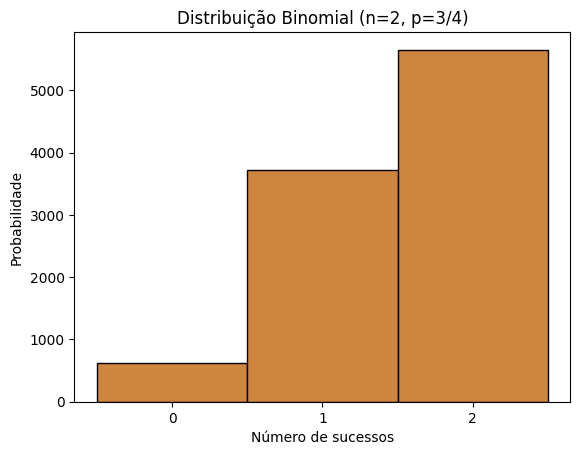

In [25]:
# Parâmetros
n = 2
p = 3/4
num_simulacoes = 10000

resultados = binomial(n, p, num_simulacoes)
print(resultados)

# Plotando o histograma
plt.hist(resultados, bins=np.arange(-0.5, n+1.5, 1), color='peru', edgecolor='black')
plt.title('Distribuição Binomial (n=2, p=3/4)')
plt.xlabel('Número de sucessos')
plt.ylabel('Probabilidade')
plt.xticks([0, 1, 2])
plt.show()

### 3. Verifique a média e a variância dos números gerados


Teoricamente devemos ter a média = $np$ e a variância $np(1-p)$

In [26]:
# Parametros
n = 2
p = 3/4
num_simulacoes = 10000
resultados = binomial(n, p, num_simulacoes)

# Resultados teoricos
media_esperada = n * p
variancia_esperada = n * p * (1 - p)

# Resultados simulados
media_calculada = resultados.mean()
variancia_calculada = resultados.var()


resposta = f"""
Média Esperada: {media_esperada:.4f}
Média Calculada: {media_calculada:.4f}
Variância Esperada: {variancia_esperada:.4f}
Variância Calculada: {variancia_calculada:.4f}
"""
print(resposta)




Média Esperada: 1.5000
Média Calculada: 1.5095
Variância Esperada: 0.3750
Variância Calculada: 0.3749



# Atividade 7: Simular um Processo de Controle de Qualidade até a Primeira Falha

## *Descrição:*

*Em um processo de controle de qualidade, podemos simular a verificação de produtos até encontrar a primeira falha, usando variáveis uniformes para modelar a probabilidade de falha.*

## Tarefas:

1. Implemente um loop que simule um processo de verificação de produtos até encontrar a primeira falha.
2. Considere a probabilidade de falha como p = 0, 05.
3. Registre o número de produtos verificados antes da primeira falha.
4. Repita a simulação 1000 vezes e calcule a média do número de produtos verificados até a primeira falha.

Basicamante, o que queremos fazer é implementar a distribuição geométrica que é dada por
$$
P(X = x) = p(1-p)^{j-1}, j \in \mathbb{N}
$$


## Implementação

In [27]:
def geometrica(p, num_simulacoes):
    resultados = []

    for i in range(num_simulacoes):
        sucessos = 0
        while True:
            sucessos += 1
            if np.random.rand() < p:
                break  # Falha encontrada, termina a simulação
        resultados.append(sucessos)
        resposta = f"""
        A quantidade de produtos verificados até a primeira falha = {sucessos}
        A média esperada é de {1 / p}
        A média calculada foi de {np.mean(resultados)}
        """
    return resposta



# Parâmetros
p = 0.05  # probabilidade de falha
num_simulacoes = 1000  # número de simulações

# Realizando a simulação
teste = geometrica(p, num_simulacoes)
print(teste)



        A quantidade de produtos verificados até a primeira falha = 7
        A média esperada é de 20.0
        A média calculada foi de 20.489
        
